In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import tensorflow as tf

# Load the model without compiling
model_fibrosis = tf.keras.models.load_model('D:/DATASET/Models/model_fibrosis.h5', compile=False)
model_inflammation = tf.keras.models.load_model('D:/DATASET/Models/model_inflammation.h5', compile=False)
model_steatosis = tf.keras.models.load_model('D:/DATASET/Models/model_steatosis.h5', compile=False)
model_ballooning = tf.keras.models.load_model('D:/DATASET/Models/model_ballooning.h5', compile=False)

In [3]:
from tensorflow.keras.optimizers import Adam

# Define your optimizer
optimizer = Adam(learning_rate=0.001)

# Compile the models
model_fibrosis.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_inflammation.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_steatosis.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_ballooning.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [4]:
# Define your data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

def train_model(model, train_data_path, validation_data_path, batch_size=32, epochs=7):
    train_generator = train_datagen.flow_from_directory(
        train_data_path,
        target_size=(299, 299),
        batch_size=batch_size,
        class_mode='categorical'
    )

    validation_generator = test_datagen.flow_from_directory(
        validation_data_path,
        target_size=(299, 299),
        batch_size=batch_size,
        class_mode='categorical'
    )

    history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

    return history

Found 5349 images belonging to 5 classes.
Found 5349 images belonging to 5 classes.
Epoch 1/7
168/168 [==============================] - 3380s 20s/step - loss: 0.3475 - accuracy: 0.8869 - val_loss: 3.1779 - val_accuracy: 0.6841
Epoch 2/7
168/168 [==============================] - 3474s 21s/step - loss: 0.1542 - accuracy: 0.9506 - val_loss: 3.5117 - val_accuracy: 0.6841
Epoch 3/7
168/168 [==============================] - 3515s 21s/step - loss: 0.1170 - accuracy: 0.9654 - val_loss: 1.8420 - val_accuracy: 0.6841
Epoch 4/7
168/168 [==============================] - 3453s 21s/step - loss: 0.1033 - accuracy: 0.9706 - val_loss: 2.1833 - val_accuracy: 0.6841
Epoch 5/7
168/168 [==============================] - 3468s 21s/step - loss: 0.0948 - accuracy: 0.9721 - val_loss: 1.9986 - val_accuracy: 0.6841
Epoch 6/7
168/168 [==============================] - 3522s 21s/step - loss: 0.0987 - accuracy: 0.9680 - val_loss: 2.0661 - val_accuracy: 0.7119
Epoch 7/7
168/168 [==============================] -

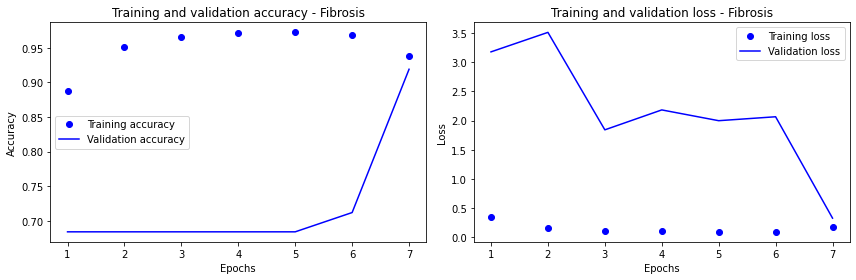

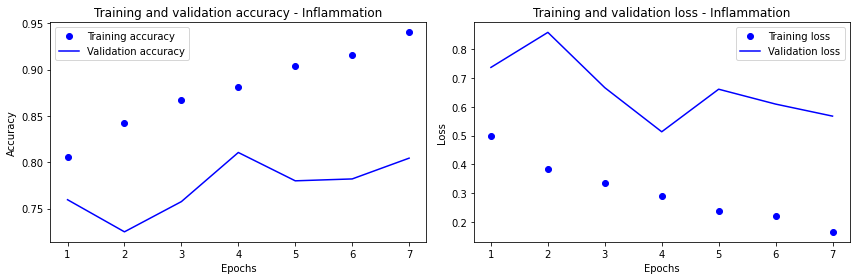

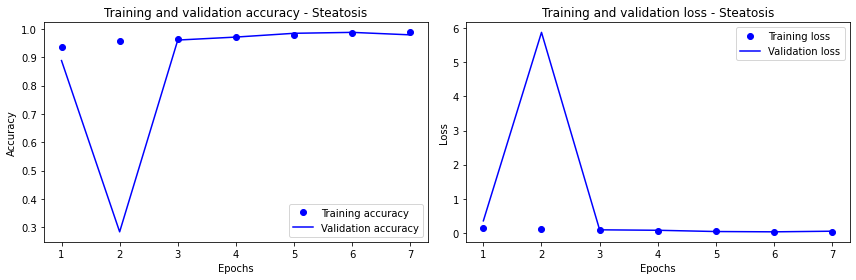

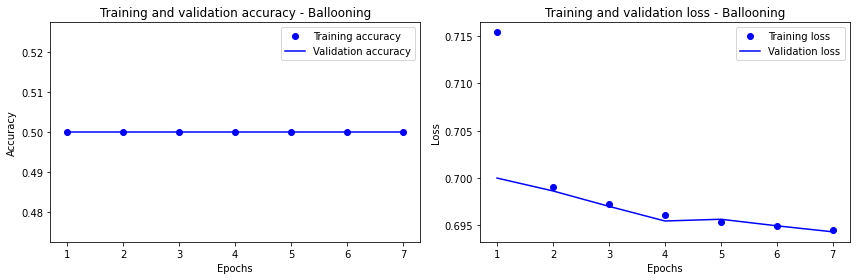

Fibrosis - Final Training Accuracy: 0.9384931921958923
Fibrosis - Final Validation Accuracy: 0.9188633561134338
Fibrosis - Final Training Loss: 0.17885635793209076
Fibrosis - Final Validation Loss: 0.3292597234249115
Inflammation - Final Training Accuracy: 0.940094530582428
Inflammation - Final Validation Accuracy: 0.8044806718826294
Inflammation - Final Training Loss: 0.1649579107761383
Inflammation - Final Validation Loss: 0.5679004192352295
Steatosis - Final Training Accuracy: 0.9880309700965881
Steatosis - Final Validation Accuracy: 0.9795409440994263
Steatosis - Final Training Loss: 0.032345183193683624
Steatosis - Final Validation Loss: 0.04940180480480194
Ballooning - Final Training Accuracy: 0.5
Ballooning - Final Validation Accuracy: 0.5
Ballooning - Final Training Loss: 0.6945374011993408
Ballooning - Final Validation Loss: 0.6943103671073914


In [5]:
# Paths to your training and validation data
train_data_path_fibrosis = 'D:/DATASET/CNN/fibrosis/train'
validation_data_path_fibrosis = 'D:/DATASET/CNN/fibrosis/val'

train_data_path_inflammation = 'D:/DATASET/CNN/inflammation/train'
validation_data_path_inflammation = 'D:/DATASET/CNN/inflammation/val'

train_data_path_steatosis = 'D:/DATASET/CNN/steatosis/train'
validation_data_path_steatosis = 'D:/DATASET/CNN/steatosis/val'

train_data_path_ballooning = 'D:/DATASET/CNN/ballooning/train'
validation_data_path_ballooning = 'D:/DATASET/CNN/ballooning/val'

# Train the models and capture history
history_fibrosis = train_model(model_fibrosis, train_data_path_fibrosis, validation_data_path_fibrosis)
history_inflammation = train_model(model_inflammation, train_data_path_inflammation, validation_data_path_inflammation)
history_steatosis = train_model(model_steatosis, train_data_path_steatosis, validation_data_path_steatosis)
history_ballooning = train_model(model_ballooning, train_data_path_ballooning, validation_data_path_ballooning)

# Function to plot metrics
def plot_metrics(history, title):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(train_acc) + 1)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title(f'Training and validation accuracy - {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'Training and validation loss - {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot metrics for each model
plot_metrics(history_fibrosis, 'Fibrosis')
plot_metrics(history_inflammation, 'Inflammation')
plot_metrics(history_steatosis, 'Steatosis')
plot_metrics(history_ballooning, 'Ballooning')

# Print final metrics
def print_final_metrics(history, title):
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    train_loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]

    print(f"{title} - Final Training Accuracy: {train_acc}")
    print(f"{title} - Final Validation Accuracy: {val_acc}")
    print(f"{title} - Final Training Loss: {train_loss}")
    print(f"{title} - Final Validation Loss: {val_loss}")

print_final_metrics(history_fibrosis, 'Fibrosis')
print_final_metrics(history_inflammation, 'Inflammation')
print_final_metrics(history_steatosis, 'Steatosis')
print_final_metrics(history_ballooning, 'Ballooning')


In [7]:
import json

# Save the training history
with open('D:/DATASET/Models/fibrosis_history7.json', 'w') as file:
    json.dump(history_fibrosis.history, file)
    
with open('D:/DATASET/Models/history_inflammation7.json', 'w') as file:
    json.dump(history_inflammation.history, file)

with open('D:/DATASET/Models/history_ballooning7.json', 'w') as file:
    json.dump(history_ballooning.history, file)
    
with open('D:/DATASET/Models/history_steatosis7.json', 'w') as file:
    json.dump(history_steatosis.history, file)